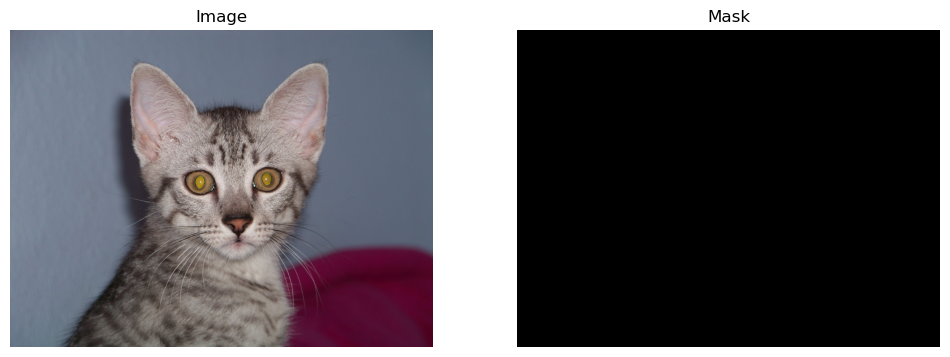

In [26]:
import os
import cv2
import matplotlib.pyplot as plt

# Directly specify the image and mask file paths
img_path = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/images/Egyptian_Mau_162.jpg"
mask_path = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/trimaps/Egyptian_Mau_162.png"

# Load the image using OpenCV and convert it from BGR to RGB for proper display
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the corresponding mask in grayscale mode
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Plot the image and mask side by side using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.show()


In [28]:
import os
import cv2
import numpy as np

# Define the directory containing your trimap masks
trimaps_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/trimaps"

# List all mask files (assuming .png files)
mask_files = [f for f in os.listdir(trimaps_dir) if f.lower().endswith('.png')]

# List to hold filenames with blank (constant) masks
blank_mask_files = []

# Loop through each mask file
for mask_file in mask_files:
    mask_path = os.path.join(trimaps_dir, mask_file)
    # Load mask in grayscale
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        # Check if all pixel values in the mask are the same
        if np.all(mask == mask[0, 0]):
            blank_mask_files.append((mask_file, mask[0, 0]))
    else:
        print(f"Warning: Could not read mask file {mask_file}")

# Print the filenames that have blank (constant) masks along with the constant value
if blank_mask_files:
    print("Filenames with blank masks (all pixels have the same value):")
    for filename, const_value in blank_mask_files:
        print(f"{filename} - Constant value: {const_value}")
    print(len(blank_mask_files))
else:
    print("No blank masks found.")


Filenames with blank masks (all pixels have the same value):
Egyptian_Mau_167.png - Constant value: 2
Egyptian_Mau_20.png - Constant value: 2
Egyptian_Mau_165.png - Constant value: 2
Egyptian_Mau_162.png - Constant value: 2
saint_bernard_78.png - Constant value: 2
Egyptian_Mau_177.png - Constant value: 2
leonberger_18.png - Constant value: 2
wheaten_terrier_195.png - Constant value: 2
Egyptian_Mau_139.png - Constant value: 2
keeshond_7.png - Constant value: 2
Egyptian_Mau_129.png - Constant value: 2
miniature_pinscher_14.png - Constant value: 2
Abyssinian_34.png - Constant value: 2
saint_bernard_15.png - Constant value: 2
Persian_259.png - Constant value: 2
Egyptian_Mau_191.png - Constant value: 2
staffordshire_bull_terrier_2.png - Constant value: 2
saint_bernard_60.png - Constant value: 2
Egyptian_Mau_145.png - Constant value: 2
japanese_chin_199.png - Constant value: 2
staffordshire_bull_terrier_22.png - Constant value: 2
Egyptian_Mau_196.png - Constant value: 2
saint_bernard_108.png

In [29]:
import os
import cv2

# Define the directory containing your images
images_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/images"

# List all image files (considering common image extensions)
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

# List to hold filenames that fail to load (likely corrupt)
corrupt_images = []

# Loop through each image file and try loading it
for filename in image_files:
    img_path = os.path.join(images_dir, filename)
    img = cv2.imread(img_path)
    if img is None:
        corrupt_images.append(filename)

# Print the filenames of the corrupt images
if corrupt_images:
    print("Corrupt image files:")
    for f in corrupt_images:
        print(f)
else:
    print("No corrupt images found.")


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Corrupt image files:
Egyptian_Mau_167.jpg
Egyptian_Mau_177.jpg
Egyptian_Mau_139.jpg
Abyssinian_34.jpg
Egyptian_Mau_191.jpg
Egyptian_Mau_145.jpg


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Number of images: 7390
Width - Min: 114, Max: 3264, Mean: 436.89
Height - Min: 103, Max: 2606, Mean: 391.05


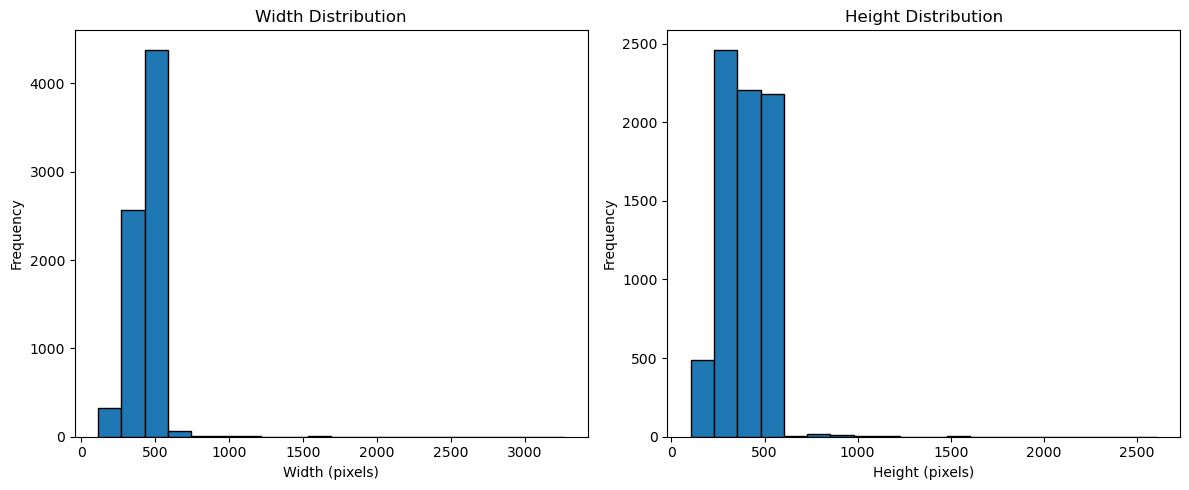

In [4]:

# Define the directory containing your images
images_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/images"

# List all image files (considering common image extensions)
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

# Initialize lists to store dimensions
widths = []
heights = []

# Loop through each image, load it and extract its dimensions
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

# Check if any images were loaded
if not widths or not heights:
    print("No valid images found in the directory.")
else:
    # Compute statistics for width and height
    print(f"Number of images: {len(image_files)}")
    print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.2f}")
    print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.2f}")

    # Plot histograms for the distributions of widths and heights
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, edgecolor='black')
    plt.title("Width Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, edgecolor='black')
    plt.title("Height Distribution")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()


In [7]:
import os
import re
from collections import Counter

# Define the directory containing your images
images_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/images"

# List all image files (considering common image extensions)
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

# Regular expression to capture animal names of the form <animal_name>_<number>.<ext>
pattern = re.compile(r"^(.*)_\d+\.(jpg|png)$", re.IGNORECASE)

# Extract animal names from each filename
animal_names = []
for filename in image_files:
    match = pattern.match(filename)
    if match:
        # The animal name is the first captured group
        animal = match.group(1)
        animal_names.append(animal)
    else:
        print(f"Skipping file (unexpected format): {filename}")

# Count the number of images for each animal
animal_counts = Counter(animal_names)

# Print the results
print("Number of images for each animal:")
for animal, count in animal_counts.items():
    print(f"{animal}: {count}")


Number of images for each animal:
Egyptian_Mau: 200
pug: 200
basset_hound: 200
Siamese: 200
shiba_inu: 200
Birman: 200
leonberger: 200
saint_bernard: 200
Abyssinian: 200
miniature_pinscher: 200
wheaten_terrier: 200
scottish_terrier: 199
pomeranian: 200
german_shorthaired: 200
english_setter: 200
newfoundland: 200
Sphynx: 200
British_Shorthair: 200
Bombay: 200
boxer: 200
great_pyrenees: 200
samoyed: 200
Russian_Blue: 200
Persian: 200
japanese_chin: 200
Ragdoll: 200
english_cocker_spaniel: 200
Maine_Coon: 200
havanese: 200
Bengal: 200
american_pit_bull_terrier: 200
keeshond: 200
american_bulldog: 200
chihuahua: 200
beagle: 200
yorkshire_terrier: 200
staffordshire_bull_terrier: 191


In [1]:
import os

# List of blank mask filenames from your previous code
blank_mask_files = [
    "Egyptian_Mau_167.png",
    "Egyptian_Mau_20.png",
    "Egyptian_Mau_165.png",
    "Egyptian_Mau_162.png",
    "saint_bernard_78.png",
    "Egyptian_Mau_177.png",
    "leonberger_18.png",
    "wheaten_terrier_195.png",
    "Egyptian_Mau_139.png",
    "keeshond_7.png",
    "Egyptian_Mau_129.png",
    "miniature_pinscher_14.png",
    "Abyssinian_34.png",
    "saint_bernard_15.png",
    "Persian_259.png",
    "Egyptian_Mau_191.png",
    "staffordshire_bull_terrier_2.png",
    "saint_bernard_60.png",
    "Egyptian_Mau_145.png",
    "japanese_chin_199.png",
    "staffordshire_bull_terrier_22.png",
    "Egyptian_Mau_196.png",
    "saint_bernard_108.png"
]

# Convert blank mask filenames to a set of image names without the .png extension
remove_names = {os.path.splitext(name)[0] for name in blank_mask_files}

# Path to your list file
list_txt_path = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/list.txt"
# Path to save the new list file
new_list_txt_path = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/new_list.txt"

# Read all lines from the original list file
with open(list_txt_path, 'r') as file:
    lines = file.readlines()

filtered_lines = []
for line in lines:
    # Keep comments and blank lines as is
    if line.startswith('#') or line.strip() == "":
        filtered_lines.append(line)
    else:
        # Split the line into tokens; the first token is assumed to be the image name
        tokens = line.split()
        image_name = tokens[0]
        # If the image name is in the set of blank mask names, skip this line
        if image_name in remove_names:
            continue
        filtered_lines.append(line)

# Write the filtered lines to a new file
with open(new_list_txt_path, 'w') as file:
    file.writelines(filtered_lines)

print(f"New list saved to {new_list_txt_path}")


New list saved to /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/new_list.txt


In [2]:
import os
import cv2
import numpy as np

# Directories
annotations_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations"
trimaps_dir = os.path.join(annotations_dir, "trimaps")

# List all mask files (assuming .png files)
mask_files = [f for f in os.listdir(trimaps_dir) if f.lower().endswith('.png')]

# List to hold filenames with blank (constant) masks
blank_mask_files = []

# Loop through each mask file to detect constant masks
for mask_file in mask_files:
    mask_path = os.path.join(trimaps_dir, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        # If all pixels are equal, record this file
        if np.all(mask == mask[0, 0]):
            blank_mask_files.append((mask_file, mask[0, 0]))
    else:
        print(f"Warning: Could not read mask file {mask_file}")

# Report results
if blank_mask_files:
    print("Filenames with blank masks (all pixels have the same value):")
    for filename, const_value in blank_mask_files:
        print(f"{filename} - Constant value: {const_value}")
    print(len(blank_mask_files))
else:
    print("No blank masks found.")

# Create a set of image names (without the .png extension) to remove
remove_names = {os.path.splitext(name)[0] for name, _ in blank_mask_files}

def process_file(file_path, new_file_path, remove_names):
    """
    Reads a file, removes lines where the first token (image name)
    is in the remove_names set, and writes the result to a new file.
    Comments and blank lines are preserved.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    filtered_lines = []
    for line in lines:
        # Keep comment lines or empty lines as-is
        if line.startswith('#') or line.strip() == "":
            filtered_lines.append(line)
        else:
            # Assume the image name is the first token on the line
            tokens = line.split()
            image_name = tokens[0]
            if image_name in remove_names:
                # Skip this line if the image is in the blank masks list
                continue
            filtered_lines.append(line)

    with open(new_file_path, 'w') as file:
        file.writelines(filtered_lines)
    print(f"New file saved to {new_file_path}")

# List of annotation files to process
files_to_process = ["list.txt", "trainval.txt", "test.txt"]

for filename in files_to_process:
    file_path = os.path.join(annotations_dir, filename)
    new_file_path = os.path.join(annotations_dir, "new_" + filename)
    process_file(file_path, new_file_path, remove_names)


Filenames with blank masks (all pixels have the same value):
Egyptian_Mau_167.png - Constant value: 2
Egyptian_Mau_20.png - Constant value: 2
Egyptian_Mau_165.png - Constant value: 2
Egyptian_Mau_162.png - Constant value: 2
saint_bernard_78.png - Constant value: 2
Egyptian_Mau_177.png - Constant value: 2
leonberger_18.png - Constant value: 2
wheaten_terrier_195.png - Constant value: 2
Egyptian_Mau_139.png - Constant value: 2
keeshond_7.png - Constant value: 2
Egyptian_Mau_129.png - Constant value: 2
miniature_pinscher_14.png - Constant value: 2
Abyssinian_34.png - Constant value: 2
saint_bernard_15.png - Constant value: 2
Persian_259.png - Constant value: 2
Egyptian_Mau_191.png - Constant value: 2
staffordshire_bull_terrier_2.png - Constant value: 2
saint_bernard_60.png - Constant value: 2
Egyptian_Mau_145.png - Constant value: 2
japanese_chin_199.png - Constant value: 2
staffordshire_bull_terrier_22.png - Constant value: 2
Egyptian_Mau_196.png - Constant value: 2
saint_bernard_108.png

In [4]:
import os
import random

# Define file paths
annotations_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations"
trainval_file = os.path.join(annotations_dir, "new_trainval.txt")
train_file = os.path.join(annotations_dir, "new_train.txt")
val_file = os.path.join(annotations_dir, "new_val.txt")

# Define train ratio and seed for reproducibility
train_ratio = 0.8
random.seed(42)

# Read the trainval file
with open(trainval_file, "r") as f:
    all_lines = f.readlines()

# Separate header lines (comments/empty) from data lines
header_lines = [line for line in all_lines if line.startswith("#") or line.strip() == ""]
data_lines = [line for line in all_lines if not (line.startswith("#") or line.strip() == "")]

# Group lines by (species, breed).
# According to your header:
#   - token[2] is the SPECIES (1 for Cat, 2 for Dog)
#   - token[3] is the BREED ID
groups = {}
for line in data_lines:
    tokens = line.split()
    if len(tokens) < 4:
        continue  # skip any malformed lines
    species = tokens[2]
    breed = tokens[3]
    key = (species, breed)
    groups.setdefault(key, []).append(line)

# Prepare lists for train and validation splits
train_lines = []
val_lines = []

# For each (species, breed) group, split the samples
for key, lines in groups.items():
    n = len(lines)
    if n == 1:
        # If only one sample exists, put it in training (to avoid an empty validation group)
        train_lines.extend(lines)
    else:
        # Calculate the number of training samples for this group.
        # Ensure at least one sample goes to validation if n > 1.
        train_count = int(n * train_ratio)
        if train_count < 1:
            train_count = 1
        if n - train_count == 0 and n > 1:
            train_count = n - 1

        # Shuffle the group and split
        random.shuffle(lines)
        train_lines.extend(lines[:train_count])
        val_lines.extend(lines[train_count:])

# Shuffle the overall train and validation lists so that the order is randomized
random.shuffle(train_lines)
random.shuffle(val_lines)

# Prepend header lines to each file (so that the header is preserved)
final_train_lines = header_lines + train_lines
final_val_lines = header_lines + val_lines

# Write the training file
with open(train_file, "w") as f:
    f.writelines(final_train_lines)
print(f"Train file saved to {train_file}")

# Write the validation file
with open(val_file, "w") as f:
    f.writelines(final_val_lines)
print(f"Validation file saved to {val_file}")

# Optional: print species (cat vs dog) counts for train and validation to verify balance
def count_species(lines):
    counts = {"cat": 0, "dog": 0}
    for line in lines:
        if line.startswith("#") or line.strip() == "":
            continue
        tokens = line.split()
        species = tokens[2]
        if species == "1":
            counts["cat"] += 1
        elif species == "2":
            counts["dog"] += 1
    return counts

train_counts = count_species(train_lines)
val_counts = count_species(val_lines)
print("Train species counts:", train_counts)
print("Validation species counts:", val_counts)


Train file saved to /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/new_train.txt
Validation file saved to /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/new_val.txt
Train species counts: {'cat': 947, 'dog': 1988}
Validation species counts: {'cat': 238, 'dog': 500}


In [5]:
import os

def get_stats(file_path):
    """
    Reads the annotation file and computes statistics.
    
    Returns a dictionary with:
      - total: total number of images
      - species: a dict mapping species id to count (species 1: Cat, 2: Dog)
      - class: a dict mapping class id to count
      - breed: a dict mapping (species, breed) tuple to count
    """
    stats = {
        'total': 0,
        'species': {},
        'class': {},
        'breed': {}  # key: (species, breed) tuple
    }
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        line = line.strip()
        # Skip header or empty lines
        if not line or line.startswith("#"):
            continue
        
        tokens = line.split()
        if len(tokens) < 4:
            continue  # skip lines that don't have enough tokens
        
        # Unpack tokens (assumes: Image, CLASS-ID, SPECIES, BREED-ID)
        image_name, class_id, species, breed_id = tokens[:4]
        
        stats['total'] += 1
        
        # Count species
        stats['species'][species] = stats['species'].get(species, 0) + 1
        
        # Count class occurrences
        stats['class'][class_id] = stats['class'].get(class_id, 0) + 1
        
        # Count breed occurrences by species and breed id
        key = (species, breed_id)
        stats['breed'][key] = stats['breed'].get(key, 0) + 1
        
    return stats

def print_stats(file_path, stats):
    """
    Prints statistics from the stats dictionary.
    """
    print(f"Statistics for {file_path}:")
    print(f"Total images: {stats['total']}")
    
    # Map species id to names (assumes 1: Cat, 2: Dog)
    species_map = {"1": "Cat", "2": "Dog"}
    print("Species distribution:")
    for species, count in stats['species'].items():
        species_name = species_map.get(species, species)
        print(f"  {species_name} ({species}): {count}")
        
    print("Class distribution:")
    # Sort by class id (converted to integer if possible)
    for class_id, count in sorted(stats['class'].items(), key=lambda x: int(x[0])):
        print(f"  Class {class_id}: {count}")
        
    # Separate breed distribution for cats and dogs
    cat_breeds = {breed: count for (species, breed), count in stats['breed'].items() if species == "1"}
    dog_breeds = {breed: count for (species, breed), count in stats['breed'].items() if species == "2"}
    
    print("Breed distribution for Cats:")
    for breed, count in sorted(cat_breeds.items(), key=lambda x: int(x[0])):
        print(f"  Breed {breed}: {count}")
        
    print("Breed distribution for Dogs:")
    for breed, count in sorted(dog_breeds.items(), key=lambda x: int(x[0])):
        print(f"  Breed {breed}: {count}")
    
    print("="*50)
    
def main():
    # Define the annotation directory and file paths
    annotations_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations"
    train_file = os.path.join(annotations_dir, "new_train.txt")
    val_file = os.path.join(annotations_dir, "new_val.txt")
    
    # Compute statistics for each file
    train_stats = get_stats(train_file)
    val_stats = get_stats(val_file)
    
    # Print the statistics
    print_stats(train_file, train_stats)
    print_stats(val_file, val_stats)

if __name__ == "__main__":
    main()


Statistics for /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Data/annotations/new_train.txt:
Total images: 2935
Species distribution:
  Dog (2): 1988
  Cat (1): 947
Class distribution:
  Class 1: 80
  Class 2: 80
  Class 3: 80
  Class 4: 80
  Class 5: 80
  Class 6: 80
  Class 7: 80
  Class 8: 76
  Class 9: 80
  Class 10: 80
  Class 11: 80
  Class 12: 72
  Class 13: 76
  Class 14: 80
  Class 15: 80
  Class 16: 80
  Class 17: 80
  Class 18: 80
  Class 19: 80
  Class 20: 79
  Class 21: 80
  Class 22: 79
  Class 23: 76
  Class 24: 80
  Class 25: 80
  Class 26: 80
  Class 27: 80
  Class 28: 80
  Class 29: 78
  Class 30: 80
  Class 31: 80
  Class 32: 80
  Class 33: 79
  Class 34: 80
  Class 35: 80
  Class 36: 80
  Class 37: 80
Breed distribution for Cats:
  Breed 1: 80
  Breed 2: 80
  Breed 3: 80
  Breed 4: 76
  Breed 5: 80
  Breed 6: 72
  Breed 7: 80
  Breed 8: 80
  Breed 9: 80
  Breed 10: 80
  Breed 11: 79
  Breed 12: 80
Breed distribution for Dogs:
  Breed 1: 80
  Breed 2: 80
  Breed 3